מוריד נתונים עבור TA35.TA מהשנתיים האחרונות...


[*********************100%***********************]  1 of 1 completed


סה"כ נתונים שנמצאו: 475 ימי מסחר.
גודל סט האימון (Train): 427
גודל סט המבחן (Test): 48

מתחיל תהליך חיזוי מתגלגל עם ARIMA(1, 1, 1)...
צעד 10/48: חיזוי=2989.56, ערך אמיתי=2986.60
צעד 20/48: חיזוי=3054.85, ערך אמיתי=3038.65
צעד 30/48: חיזוי=3066.39, ערך אמיתי=3053.12
צעד 40/48: חיזוי=3202.84, ערך אמיתי=3275.47
צעד 48/48: חיזוי=3180.26, ערך אמיתי=3197.16

 תהליך החיזוי הושלם.
 קובץ התחזית נשמר: TA35_ARIMA_forecast.csv

--- הערכת ביצועי המודל ---
RMSE: 34.82
MAPE: 0.92%


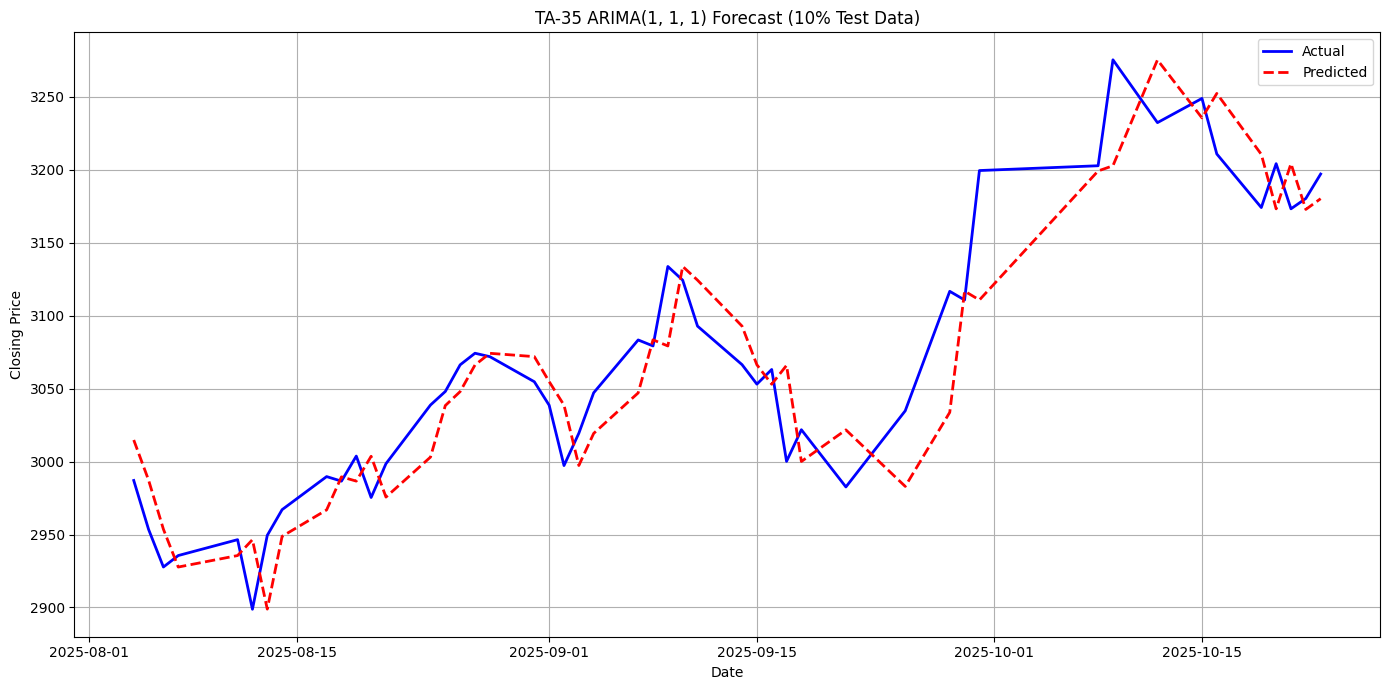

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# --- הגדרות ---
ticker = 'TA35.TA'
arima_order = (1, 1, 1)
split_ratio = 0.9

# --- הורדת נתונים ---
print(f"מוריד נתונים עבור {ticker} מהשנתיים האחרונות...")
end_date = datetime.now()
start_date = end_date - timedelta(days=2 * 365)

data = yf.download(ticker, start=start_date, end=end_date)
if data.empty:
    raise ValueError(f"לא נמצאו נתונים עבור {ticker}.")
data.to_csv('a.csv')
# נוודא שמדובר בסדרה נקייה ונומרית
ts_data = data['Close'].dropna().astype(float).squeeze()
ts_data.to_csv('TA35_data.csv', index=False, encoding='utf-8-sig')
print(f"סה\"כ נתונים שנמצאו: {len(ts_data)} ימי מסחר.")

# --- פיצול נתונים ---
split_index = int(len(ts_data) * split_ratio)
train_data = ts_data.iloc[:split_index]
test_data = ts_data.iloc[split_index:]

print(f"גודל סט האימון (Train): {len(train_data)}")
print(f"גודל סט המבחן (Test): {len(test_data)}")

# --- חיזוי מתגלגל ---
history = train_data.values.tolist()  # ← כאן השינוי!
predictions = []

print(f"\nמתחיל תהליך חיזוי מתגלגל עם ARIMA{arima_order}...")

for t in range(len(test_data)):
    try:
        history_array = np.array(history, dtype=float)
        history_array = history_array[~np.isnan(history_array)]

        model = ARIMA(history_array, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
    except Exception as e:
        print(f"שגיאה באימון בצעד {t}: {e}")
        yhat = history[-1]  # fallback

    predictions.append(yhat)

    actual_obs = float(test_data.iloc[t])
    history.append(actual_obs)

    if (t + 1) % 10 == 0 or t == len(test_data) - 1:
        print(f"צעד {t + 1}/{len(test_data)}: חיזוי={yhat:.2f}, ערך אמיתי={actual_obs:.2f}")

print("\n תהליך החיזוי הושלם.")
results_df.to_csv('TA35_ARIMA_forecast.csv', index=False, encoding='utf-8-sig')
results_df = pd.DataFrame({
    'Date': test_data.index,
    'Actual': test_data.values,
    'Predicted': predictions_series.values
})

print(" קובץ התחזית נשמר: TA35_ARIMA_forecast.csv")


# --- הערכת ביצועים ---
predictions_series = pd.Series(predictions, index=test_data.index)
rmse = np.sqrt(mean_squared_error(test_data, predictions_series))
mape = mean_absolute_percentage_error(test_data, predictions_series) * 100

print("\n--- הערכת ביצועי המודל ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# --- גרף ---
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data, label='Actual', color='blue', linewidth=2)
plt.plot(predictions_series.index, predictions_series, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title(f'TA-35 ARIMA{arima_order} Forecast (10% Test Data)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


מוריד נתונים עבור TA35.TA מהשנים האחרונות...


[*********************100%***********************]  1 of 1 completed


סה"כ נתונים שנמצאו: 2426 ימי מסחר.
תאריך התחלה: 2015-10-29 00:00:00, תאריך סיום: 2025-10-23 00:00:00
גודל סט האימון (Train): 2183
גודל סט המבחן (Test): 243

מתחיל תהליך חיזוי מתגלגל עם ARIMA(1, 1, 1)...
צעד 10/243: חיזוי=2170.78, ערך אמיתי=2174.24
צעד 20/243: חיזוי=2288.91, ערך אמיתי=2276.03
צעד 30/243: חיזוי=2281.49, ערך אמיתי=2303.39
צעד 40/243: חיזוי=2358.61, ערך אמיתי=2348.60
צעד 50/243: חיזוי=2402.93, ערך אמיתי=2394.00
צעד 60/243: חיזוי=2450.38, ערך אמיתי=2458.76
צעד 70/243: חיזוי=2517.36, ערך אמיתי=2520.70
צעד 80/243: חיזוי=2508.18, ערך אמיתי=2491.34
צעד 90/243: חיזוי=2514.95, ערך אמיתי=2483.98
צעד 100/243: חיזוי=2466.97, ערך אמיתי=2493.87
צעד 110/243: חיזוי=2501.70, ערך אמיתי=2420.33
צעד 120/243: חיזוי=2448.47, ערך אמיתי=2352.30
צעד 130/243: חיזוי=2491.79, ערך אמיתי=2461.08
צעד 140/243: חיזוי=2569.18, ערך אמיתי=2609.36
צעד 150/243: חיזוי=2643.13, ערך אמיתי=2626.73
צעד 160/243: חיזוי=2735.10, ערך אמיתי=2735.73
צעד 170/243: חיזוי=2834.56, ערך אמיתי=2877.78
צעד 180/243: חיזוי=3027.

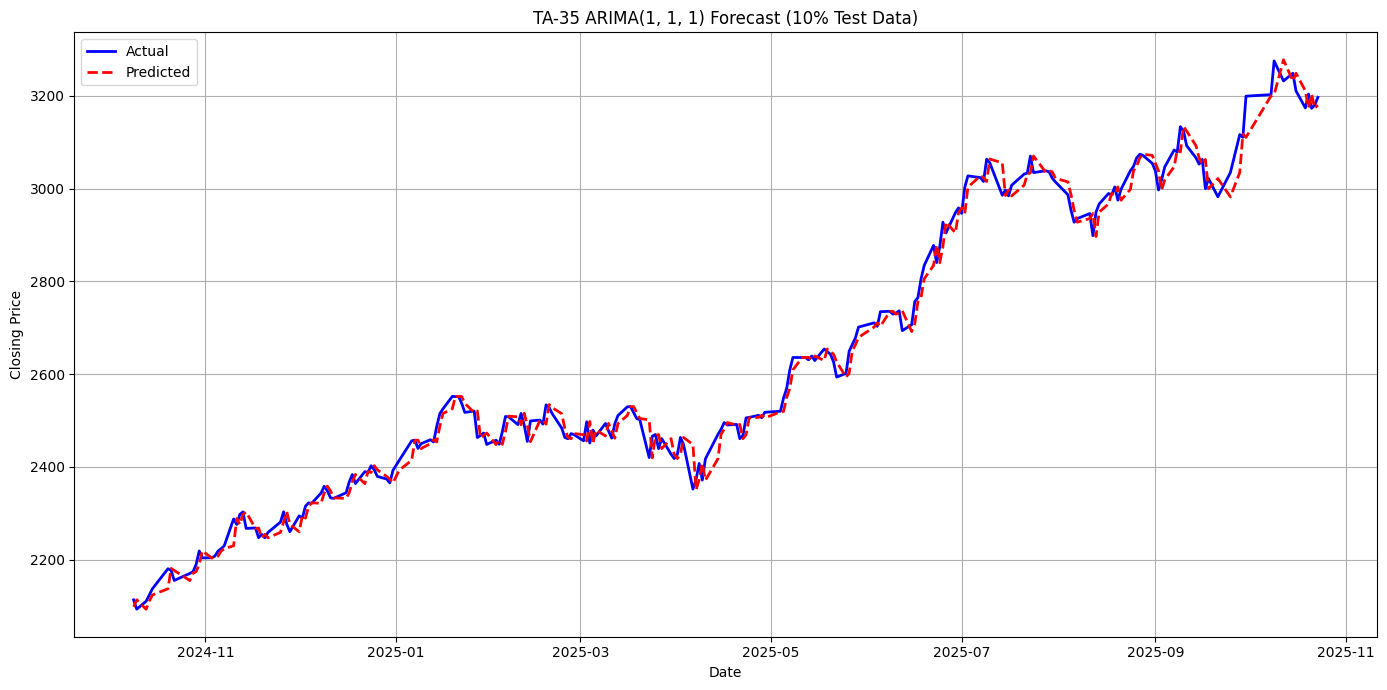

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# --- 0. הגדרות ---
ticker = 'TA35.TA'
arima_order = (1, 1, 1)
split_ratio = 0.9

# --- 1. הורדת נתונים ---
print(f"מוריד נתונים עבור {ticker} מהשנים האחרונות...")
end_date = datetime.now()
start_date = end_date - timedelta(days=10 * 365) # 5 שנים אחורה

data = yf.download(ticker, start=start_date, end=end_date)
if data.empty:
    raise ValueError(f"לא נמצאו נתונים עבור {ticker}.")

# נוודא שמדובר בסדרה נקייה ונומרית
ts_data = data['Close'].dropna().astype(float).squeeze()

print(f"סה\"כ נתונים שנמצאו: {len(ts_data)} ימי מסחר.")
print(f"תאריך התחלה: {ts_data.index[0]}, תאריך סיום: {ts_data.index[-1]}")

# --- 2. פיצול נתונים ---
split_index = int(len(ts_data) * split_ratio)
train_data = ts_data.iloc[:split_index]
test_data = ts_data.iloc[split_index:]

print(f"גודל סט האימון (Train): {len(train_data)}")
print(f"גודל סט המבחן (Test): {len(test_data)}")

# --- 3. חיזוי מתגלגל ---
history = train_data.values.tolist()
predictions = [] # זו הרשימה שתכיל את החיזויים

print(f"\nמתחיל תהליך חיזוי מתגלגל עם ARIMA{arima_order}...")

for t in range(len(test_data)):
    try:
        # ודא שההיסטוריה היא מערך נקי ללא NaNs
        history_array = np.array(history, dtype=float)
        history_array = history_array[~np.isnan(history_array)]

        model = ARIMA(history_array, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
    except Exception as e:
        # print(f"שגיאה באימון בצעד {t}: {e}") # אפשר להדליק לדיבוג
        yhat = history[-1]  # שימוש בערך האחרון הידוע במקרה כישלון

    # --- זה החלק החשוב ---
    # הוספת החיזוי *תמיד*, בין אם הצליח או נכשל
    predictions.append(yhat)

    # הוספת הערך האמיתי להיסטוריה לאימון הבא
    actual_obs = float(test_data.iloc[t])
    history.append(actual_obs)

    if (t + 1) % 10 == 0 or t == len(test_data) - 1:
        print(f"צעד {t + 1}/{len(test_data)}: חיזוי={yhat:.2f}, ערך אמיתי={actual_obs:.2f}")

print("\n תהליך החיזוי הושלם.")

# --- 4. יצירת DataFrame וקובץ (החלק המתוקן) ---
#    כאן אנו בודקים את השגיאה 'ValueError'
try:
    results_df = pd.DataFrame({
        'Date': test_data.index,
        'Actual': test_data.values,
        'Predicted': predictions  # <-- שימוש ברשימה 'predictions' שיצרנו
    })
except ValueError as e:
    print("--- !!! אופס, השגיאה 'ValueError' עדיין קיימת !!! ---")
    print(f"השגיאה: {e}")
    print(f"אורך test_data.index: {len(test_data.index)}")
    print(f"אורך test_data.values: {len(test_data.values)}")
    print(f"אורך הרשימה 'predictions': {len(predictions)}")
    print("זה לא אמור לקרות. בדוק את לוגיקת הלולאה שלך שוב.")
    raise e

# 2. *עכשיו* ש-'results_df' קיים, אפשר לשמור אותו
results_df.to_csv('TA35_ARIMA_forecast.csv', index=False, encoding='utf-8-sig')
print(" קובץ התחזית נשמר: TA35_ARIMA_forecast.csv")


# --- 5. הערכת ביצועים ---
# אין צורך ליצור 'predictions_series' מחדש,
# אפשר להשתמש בעמודות מ-results_df
rmse = np.sqrt(mean_squared_error(results_df['Actual'], results_df['Predicted']))
mape = mean_absolute_percentage_error(results_df['Actual'], results_df['Predicted']) * 100

print("\n--- הערכת ביצועי המודל ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# --- 6. גרף ---
print("מציג גרף...")
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title(f'TA-35 ARIMA{arima_order} Forecast (10% Test Data)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('TA35_forecast_plot.png')
print("הגרף נשמר כ-TA35_forecast_plot.png")
# plt.show() # 'show' לא עובד בסביבה זו, 'savefig' כן.